In [57]:
%matplotlib notebook
import pystan
import numpy as np
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [20]:
x = np.random.normal(size=[10, 10])
y = np.random.normal(size=[10])

In [21]:
x, y = datasets.load_boston(return_X_y=True)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [58]:
xscaler = preprocessing.StandardScaler().fit(x_train)
yscaler = preprocessing.StandardScaler().fit(y_train)

/Users/roliveira/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [59]:
x_train = xscaler.transform(x_train)
x_test = xscaler.transform(x_test)

y_train = yscaler.transform(y_train)
y_test = yscaler.transform(y_test)

/Users/roliveira/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/roliveira/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [48]:
code = '''
data {
    int d;
    int n_train;
    int n_test;
    matrix[n_train, d] x_train;
    matrix[n_test, d] x_test;
    real y_train[n_train];
}
parameters {
    vector[d] w;
    real b;
    real sigma;
}
model {
    w ~ normal(0, 1);
    b ~ normal(0, 1);
    sigma ~ gamma(1.0, 2.0);
    y_train ~ normal(x_train*w + b, sigma);
}
generated quantities {
    real y_test[n_test];
    for(i in 1:n_test)
        y_test[i] <- normal_rng(x_test[i]*w + b, sigma);
}
'''
model = pystan.StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b49fefbef25589fb5abc381958d0d269 NOW.


In [60]:
data = {
    'd': len(x[0]),
    'n_train': len(x_train),
    'n_test': len(x_test),
    'x_train': x_train,
    'x_test': x_test,
    'y_train': y_train,
}

fit = model.sampling(data=data, iter=10000)

<IPython.core.display.Javascript object>


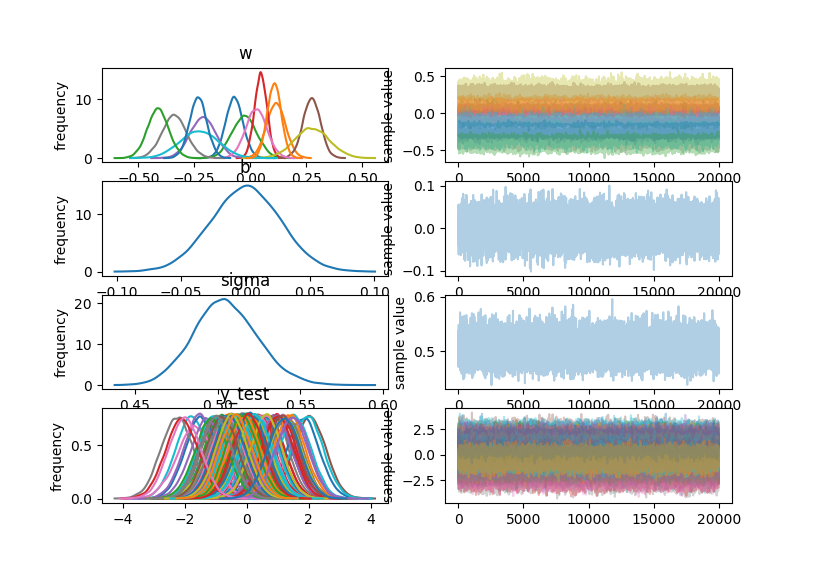

In [61]:
fit.plot();

In [62]:
y_pred = fit.extract('y_test')['y_test']

In [63]:
y_test.shape, y_pred.shape

((152,), (20000, 152))

In [64]:
metrics.mean_squared_error(y_test, y_pred.mean(axis=0))

0.27628620475926785

In [65]:
y_pred2 = linear_model.Ridge().fit(x_train, y_train).predict(x_test)

In [66]:
metrics.mean_squared_error(y_test, y_pred2)

0.27637853855415156